# Big mart sales prediction

## In this dataset we will predict Item_Outlet_Sales (Target : Item_Outlet_Sales)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
big_mart_data=pd.read_csv('train.csv')
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
big_mart_data.shape

(8523, 12)

In [4]:
big_mart_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### we found missing values in Item_Weight  & Outlet_Size                  
#we have to impute with with mean, mode coresponding columns

In [6]:
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)
#big_mart_data['Outlet_Size'].fillna(big_mart_data['Outlet_Size'].mode()[0],inplace=True)

In [7]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### Replacing missing values in 'Outlet_Size' according to 'Outlet_Type'

In [8]:
outlet_size_mode = big_mart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=lambda x: x.mode().iat[0])
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [9]:
missing_values=big_mart_data['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [10]:
#big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x:outlet_size_mode)
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].map({'Grocery Store':'Small','Supermarket Type1':'Small','Supermarket Type2':'Medium','Supermarket Type3':'Medium'})

In [11]:
 big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## EDA

In [13]:
sns.set()

c:\users\sivashanmugavadivel\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


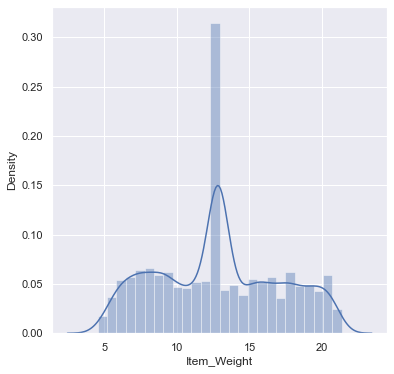

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

c:\users\sivashanmugavadivel\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


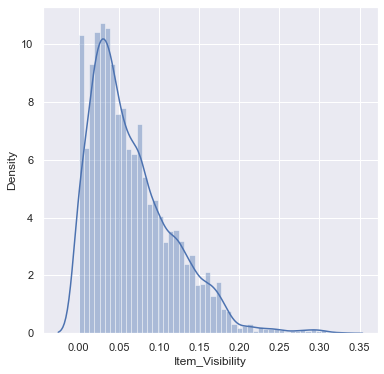

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

c:\users\sivashanmugavadivel\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


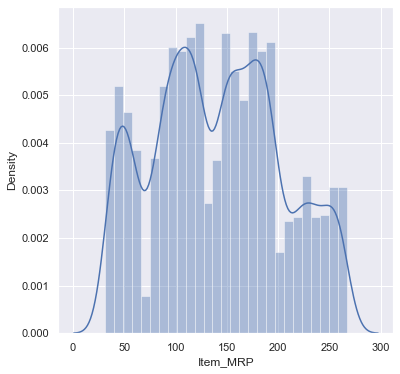

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

c:\users\sivashanmugavadivel\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


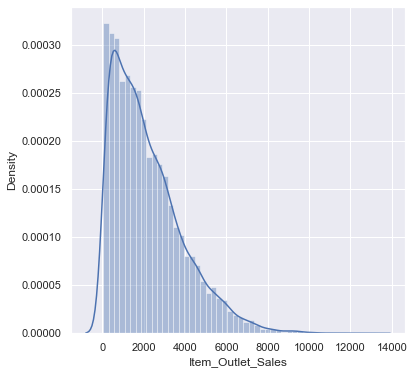

In [17]:
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

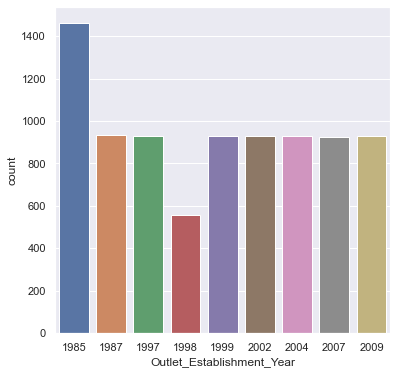

In [18]:
#Outlet_Establishment_Year
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data)
plt.show()

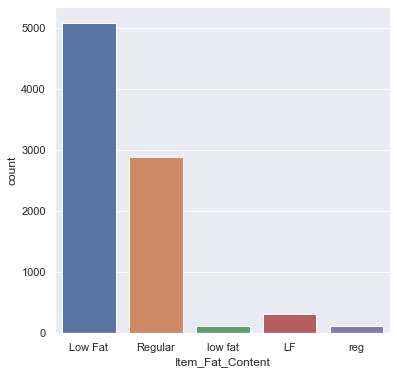

In [19]:
#Item_Fat_Content 
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

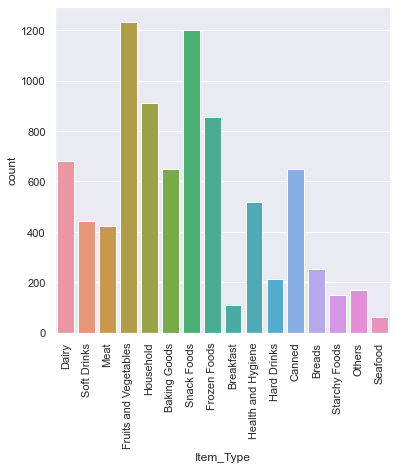

In [20]:
#Item_Type 
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Type',data=big_mart_data)
plt.xticks(rotation=90)
plt.show()

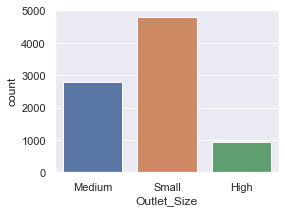

In [21]:
#Outlet_Size 
plt.subplots(figsize=(4,3))
sns.countplot(x='Outlet_Size',data=big_mart_data)
plt.xticks(rotation=0)
plt.show()

In [22]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [24]:
Item_Fat_Content_in_order=big_mart_data.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().reset_index().sort_values('Item_Outlet_Sales')['Item_Fat_Content']

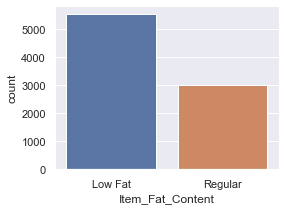

In [25]:
plt.figure(figsize=(4,3))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

(array([0, 1]), [Text(0, 0, 'Low Fat'), Text(1, 0, 'Regular')])

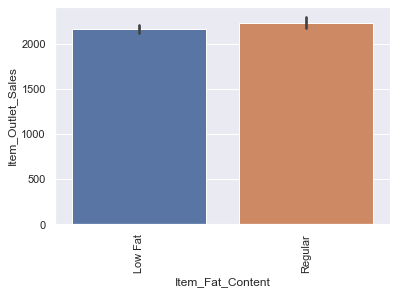

In [26]:

sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=big_mart_data,order=Item_Fat_Content_in_order)
plt.xticks(rotation=90)


In [27]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [28]:
big_mart_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [29]:

eyear_in_order=big_mart_data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().reset_index().sort_values('Item_Outlet_Sales')['Outlet_Establishment_Year']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1998'),
  Text(1, 0, '2009'),
  Text(2, 0, '2002'),
  Text(3, 0, '1997'),
  Text(4, 0, '1987'),
  Text(5, 0, '2007'),
  Text(6, 0, '1999'),
  Text(7, 0, '2004'),
  Text(8, 0, '1985')])

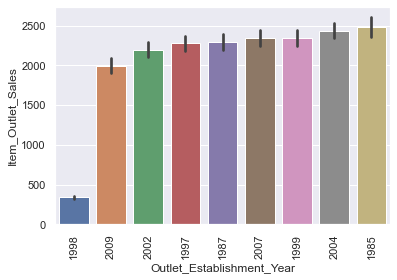

In [30]:
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=big_mart_data,order=eyear_in_order)
plt.xticks(rotation=90)


#### According to the above plot Outlet_Establishment_Year does not related with Item_Outlet_Sales so we neglect this feature

#### important note we remove uncessary columns Item_Identifier,Outlet_Identifier(it does not help prediction)

### Checking Relation between Outlet_Size AND Item_Outlet_Sales

In [31]:
Outlet_Size_in_order=big_mart_data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().reset_index().sort_values('Item_Outlet_Sales')['Outlet_Size']

(array([0, 1, 2]),
 [Text(0, 0, 'Small'), Text(1, 0, 'High'), Text(2, 0, 'Medium')])

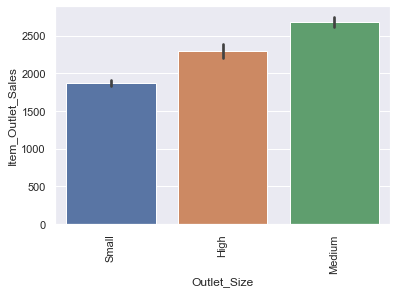

In [32]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=big_mart_data,order=Outlet_Size_in_order)
plt.xticks(rotation=90)

### Checking Relation between Item_Type AND Item_Outlet_Sales

In [33]:
itemtype_in_order=big_mart_data.groupby('Item_Type')['Item_Outlet_Sales'].mean().reset_index().sort_values('Item_Outlet_Sales')['Item_Type']
itemtype_mean=big_mart_data.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values()
itemtype_mean

Item_Type
Others                   1926.139702
Baking Goods             1952.971207
Soft Drinks              2006.511735
Health and Hygiene       2010.000265
Breakfast                2111.808651
Frozen Foods             2132.867744
Hard Drinks              2139.221622
Meat                     2158.977911
Breads                   2204.132226
Canned                   2225.194904
Dairy                    2232.542597
Household                2258.784300
Snack Foods              2277.321739
Fruits and Vegetables    2289.009592
Seafood                  2326.065928
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Baking Goods'),
  Text(2, 0, 'Soft Drinks'),
  Text(3, 0, 'Health and Hygiene'),
  Text(4, 0, 'Breakfast'),
  Text(5, 0, 'Frozen Foods'),
  Text(6, 0, 'Hard Drinks'),
  Text(7, 0, 'Meat'),
  Text(8, 0, 'Breads'),
  Text(9, 0, 'Canned'),
  Text(10, 0, 'Dairy'),
  Text(11, 0, 'Household'),
  Text(12, 0, 'Snack Foods'),
  Text(13, 0, 'Fruits and Vegetables'),
  Text(14, 0, 'Seafood'),
  Text(15, 0, 'Starchy Foods')])

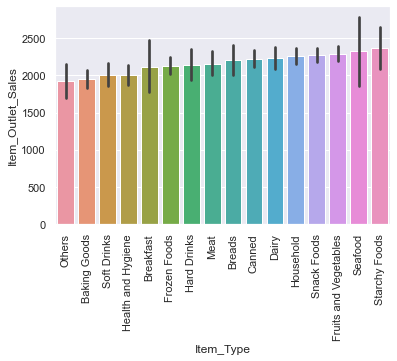

In [34]:
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=big_mart_data,order=itemtype_in_order)
plt.xticks(rotation=90)

### Checking Relation between Item_MRP AND Item_Outlet_Sales

In [35]:
Outlet_Size_in_order=big_mart_data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().reset_index().sort_values('Item_Outlet_Sales')['Outlet_Size']

(array([0, 1, 2]),
 [Text(0, 0, 'Small'), Text(1, 0, 'High'), Text(2, 0, 'Medium')])

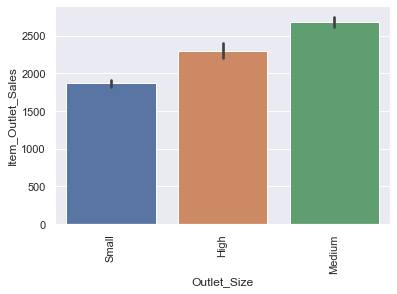

In [36]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=big_mart_data,order=Outlet_Size_in_order)
plt.xticks(rotation=90)

### Checking Relation between Outlet_Location_Type AND Item_Outlet_Sales

In [37]:
#Outlet_Location_Type
Outlet_Location_Type_in_order=big_mart_data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().reset_index().sort_values('Item_Outlet_Sales')['Outlet_Location_Type']

(array([0, 1, 2]),
 [Text(0, 0, 'Tier 1'), Text(1, 0, 'Tier 3'), Text(2, 0, 'Tier 2')])

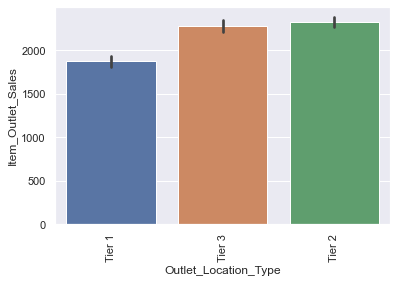

In [38]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=big_mart_data,order=Outlet_Location_Type_in_order)
plt.xticks(rotation=90)

### Checking Relation between Outlet_Type AND Item_Outlet_Sales

In [39]:
#Outlet_Type
Outlet_Type_in_order=big_mart_data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().reset_index().sort_values('Item_Outlet_Sales')['Outlet_Type']

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Grocery Store'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Supermarket Type1'),
  Text(3, 0, 'Supermarket Type3')])

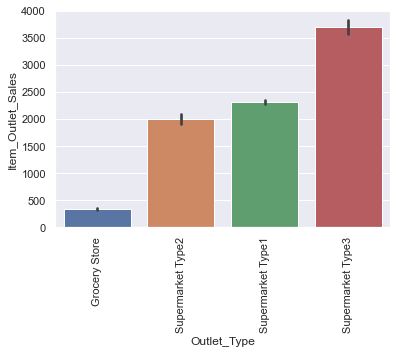

In [40]:
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=big_mart_data,order=Outlet_Type_in_order)
plt.xticks(rotation=90)

In [41]:
#Item_Fat_Content
#item type
#Outlet_Size
#Outlet_Location_Type
#Outlet_Type
big_mart_data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


# Label Encoding

In [42]:
big_mart_data['Item_Fat_Content']=big_mart_data['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})

In [43]:
big_mart_data['Item_Type']=big_mart_data['Item_Type'].map({'Others':0,'Regular':1,'Baking Goods':1,'Soft Drinks':2,'Health and Hygiene':3,'Breakfast':4,'Frozen Foods':5,'Hard Drinks':6,'Meat':7,'Breads':8,'Canned':9,'Dairy':10,'Household':11,'Snack Foods':12,'Fruits and Vegetables':13,'Seafood':14,'Starchy Foods':15})

In [44]:
big_mart_data['Outlet_Size']=big_mart_data['Outlet_Size'].map({'Small':0,'High':1,'Medium':2})

In [45]:
big_mart_data['Outlet_Location_Type']=big_mart_data['Outlet_Location_Type'].map({'Tier 1':0,'Tier 3':1,'Tier 2':2})

In [46]:
big_mart_data['Outlet_Type']=big_mart_data['Outlet_Type'].map({'Grocery Store':0,'Supermarket Type2':1,'Supermarket Type1':2,'Supermarket Type3':3})

## Spliting Data

In [47]:
X=big_mart_data[['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
y=big_mart_data['Item_Outlet_Sales']

In [48]:
X.isnull().sum()

Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=8)

## Scaling the data

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ML MODELS

## Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [52]:
print(regressor.intercept_) # c

2165.419529198793


In [54]:
coeff_df=pd.DataFrame(regressor.coef_,['Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type'], columns=['Coefficient'])
coeff_df

,Coefficient
Item_Fat_Content,23.284126
Item_Visibility,-2.436202
Item_Type,11.695287
Item_MRP,956.560201
Outlet_Size,232.719531
Outlet_Location_Type,101.980450
Outlet_Type,702.437966


In [55]:
y_pred = regressor.predict(X_test) 

In [57]:
lrp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Error': y_pred - y_test})
lrp

,Actual,Predicted,Error
2317,3615.2940,4079.323130,464.029130
6130,3115.9440,2780.195394,-335.748606
1331,2536.6980,4051.723330,1515.025330
781,1431.4700,1055.655679,-375.814321
4181,1976.0944,2604.581885,628.487485
...,...,...,...
4073,625.8520,2805.426800,2179.574800
4366,4042.7376,3265.658209,-777.079391
450,1139.8496,2278.447518,1138.597918
4540,5303.0970,4384.889598,-918.207402


In [58]:
print('Linear Regression R2- SCORE:', metrics.r2_score(y_test,y_pred))

Linear Regression R2- SCORE: 0.5613564687424311


## KNN Regression MODEL

In [59]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()

knn_model.fit(X_train,y_train)
# Predictions
knnpreds = knn_model.predict(X_test)

# Performance
performance = pd.DataFrame({ 'Actual': y_test,
                            'Predicted': knnpreds,
                            'difference': y_test - knnpreds})
# View
performance

,Actual,Predicted,difference
2317,3615.2940,3375.87232,239.42168
6130,3115.9440,1876.22440,1239.71960
1331,2536.6980,2856.28200,-319.58400
781,1431.4700,804.55272,626.91728
4181,1976.0944,1800.45636,175.63804
...,...,...,...
4073,625.8520,1984.61664,-1358.76464
4366,4042.7376,2553.47616,1489.26144
450,1139.8496,1906.85120,-767.00160
4540,5303.0970,4749.15140,553.94560


## CROSS VALIDATION SCORE FOR KNN MODEL

In [63]:
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50,60,70,80,90,100]:
    knn = KNeighborsRegressor(i) #initialising the model
    knn.fit(X_train,y_train) # training the model
    print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " test score : ", knn.score(X_test,y_test) , " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10))) #predicting using the model


K value  :  1  train score :  1.0  test score :  0.25187956724842075  score :  0.18619551510669408
K value  :  2  train score :  0.7980939777359267  test score :  0.430750736099647  score :  0.37740874305206273
K value  :  3  train score :  0.7235837048710614  test score :  0.4827912733986274  score :  0.45128844508716925
K value  :  4  train score :  0.6904534473720002  test score :  0.513396460664121  score :  0.48565731847078447
K value  :  5  train score :  0.6691673570122938  test score :  0.5395255445860551  score :  0.5101734922887895
K value  :  6  train score :  0.6586981499803597  test score :  0.5502844608705382  score :  0.5190103302606036
K value  :  7  train score :  0.6487791437868022  test score :  0.5567958426035999  score :  0.5296422395573868
K value  :  8  train score :  0.6405910898842702  test score :  0.5638751114782807  score :  0.5382476751431553
K value  :  9  train score :  0.6375226586297695  test score :  0.5695936876660637  score :  0.5444068488452902
K va

In [64]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=50).fit(X_train, y_train)

# Score
score_knn = knn_model.score(X_test, y_test)

print('According to cross validation score Best KNN model :k=50')
print(score_knn)

According to cross validation score Best KNN model :k=50
0.5844968302601876


## Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=5)

# Fit dt to the training set
dt.fit(X_train, y_train)
dy_pred=dt.predict(X_test)
performance = pd.DataFrame({ 'Actual': y_test,
                            'Predicted': dy_pred,
                            'diff': dy_pred - y_test})
# View
performance

,Actual,Predicted,diff
2317,3615.2940,3907.990777,292.696777
6130,3115.9440,2559.783505,-556.160495
1331,2536.6980,3907.990777,1371.292777
781,1431.4700,952.656415,-478.813585
4181,1976.0944,2020.515383,44.420983
...,...,...,...
4073,625.8520,2559.783505,1933.931505
4366,4042.7376,3076.280992,-966.456608
450,1139.8496,2020.515383,880.665783
4540,5303.0970,5420.844227,117.747227


In [69]:
from sklearn.metrics import  r2_score

# Compute y_pred
dy_pred = dt.predict(X_test)

# Compute mse_dt
rsquared = r2_score(y_test,dy_pred)
# Compute rmse_dt
print('r2_score of decision regressor :',rsquared)

# Print rmse_dt
#print("Test set R2 of dt: {:.2f}".format(rsquared))

r2_score of decision regressor : 0.6117079353611574


In [67]:
from sklearn.model_selection import cross_val_score 
import numpy as np
for depth in [1,2,3,4,5,6,7,8,9,10,20,50,75,100]:
    dt = DecisionTreeRegressor(max_depth=depth) 
    dt.fit(X_train, y_train)
    trainAccuracy = r2_score(y_train, dt.predict(X_train)) 
  
    valAccuracy = cross_val_score(dt, X_train, y_train, cv=10)
    print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.23038657522323946  Cross val score :  0.22362537049177855
Depth  :  2  Training Accuracy :  0.4268253568775576  Cross val score :  0.4239297849465098
Depth  :  3  Training Accuracy :  0.5157151790333596  Cross val score :  0.5118481460754352
Depth  :  4  Training Accuracy :  0.5779039724967706  Cross val score :  0.5678936844912373
Depth  :  5  Training Accuracy :  0.5973027767663596  Cross val score :  0.580346681622451
Depth  :  6  Training Accuracy :  0.612085722306746  Cross val score :  0.5700902778331105
Depth  :  7  Training Accuracy :  0.626615633422227  Cross val score :  0.5614840268197547
Depth  :  8  Training Accuracy :  0.644590882589018  Cross val score :  0.5433808887920583
Depth  :  9  Training Accuracy :  0.6689746480722593  Cross val score :  0.5176555602213461
Depth  :  10  Training Accuracy :  0.6950482114375043  Cross val score :  0.49690720747644257
Depth  :  20  Training Accuracy :  0.9623704102176139  Cross val score :  0.2053

## PREDICTION USING USING RANDOM FOREST REGRESSOR

In [74]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 10)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

In [75]:
rf_pred=regressor.predict(X_test)


In [76]:
decisiontree_prediction=pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred,'Diffrence':rf_pred-y_test})
decisiontree_prediction

,Actual,Predicted,Diffrence
2317,3615.2940,4030.173954,414.879954
6130,3115.9440,2473.373762,-642.570238
1331,2536.6980,3788.395342,1251.697342
781,1431.4700,631.378140,-800.091860
4181,1976.0944,2096.597542,120.503142
...,...,...,...
4073,625.8520,2830.242562,2204.390562
4366,4042.7376,3914.331412,-128.406188
450,1139.8496,1493.189660,353.340060
4540,5303.0970,6196.973448,893.876448


In [77]:
rfscore = r2_score(y_test,rf_pred)
# Compute rmse_dtrfscore
print('r2_score of decision regressor :',rfscore)

r2_score of decision regressor : 0.577630223538192


## PREDICTION USING XGBRegressor

In [80]:
import xgboost as xg

from sklearn.metrics import mean_squared_error as MSE
  

xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  
# Predict the model
xgpred = xgb_r.predict(X_test)
  
xgbooster_prediction=pd.DataFrame({'Actual': y_test, 'Predicted': xgpred,'Diffrence':xgpred-y_test})
xgbooster_prediction

[11:37:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


,Actual,Predicted,Diffrence
2317,3615.2940,4676.839355,1061.545355
6130,3115.9440,3000.638672,-115.305328
1331,2536.6980,4370.770020,1834.072020
781,1431.4700,817.648743,-613.821257
4181,1976.0944,2005.040771,28.946371
...,...,...,...
4073,625.8520,2845.260498,2219.408498
4366,4042.7376,3289.587891,-753.149709
450,1139.8496,2197.594482,1057.744882
4540,5303.0970,6917.205566,1614.108566


In [81]:
xgscore = r2_score(y_test,xgpred)
# Compute rmse_dtrfscore
print('r2_score of decision regressor :',xgscore)

r2_score of decision regressor : 0.5657034150924996
